# S＆P500のリターンの分析
株式市場において、S＆P500のリターンにどのような特徴があるか分析を行う

### データ読み込み・加工

In [1]:
#データ読み込み
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm
import seaborn as sns
from scipy.stats import t
from scipy import stats

folder='C:\\Users\\nakam\\python\\stock-analysis\\Data\\'
os.chdir(folder)
file='SandP500.xlsx'
df=pd.read_excel(file)
df.head()

,日付,始値,高値,安値,終値
0,2011-07-29,1320.64,1356.48,1282.86,1292.28
1,2011-08-31,1292.59,1307.38,1101.54,1218.89
2,2011-09-30,1219.12,1229.29,1114.22,1131.42
3,2011-10-31,1131.21,1292.66,1074.77,1253.30
4,2011-11-30,1251.00,1277.55,1158.66,1246.96


In [2]:
#前日の変数を追加
for i in ['始値', '高値', '安値', '終値']:
    df[i+"(前月)"]=df[i].shift(1)
df['前月比率']=df['終値']/df['終値(前月)']
df.head()

,日付,始値,高値,安値,終値,始値(前月),高値(前月),安値(前月),終値(前月),前月比率
0,2011-07-29,1320.64,1356.48,1282.86,1292.28,NaN,NaN,NaN,NaN,NaN
1,2011-08-31,1292.59,1307.38,1101.54,1218.89,1320.64,1356.48,1282.86,1292.28,0.943209
2,2011-09-30,1219.12,1229.29,1114.22,1131.42,1292.59,1307.38,1101.54,1218.89,0.928238
3,2011-10-31,1131.21,1292.66,1074.77,1253.30,1219.12,1229.29,1114.22,1131.42,1.107723
4,2011-11-30,1251.00,1277.55,1158.66,1246.96,1131.21,1292.66,1074.77,1253.30,0.994941


### ボラティリティの計算

In [3]:
df['当月の高値-当月の安値']=df['高値']-df['安値']
df['当月の高値-前月の終値']=df['高値']-df['終値(前月)']
df['前月の終値-当月の安値']=df['終値(前月)']-df['安値']
df['True Range']=df[['当月の高値-当月の安値','当月の高値-前月の終値','前月の終値-当月の安値']].max(axis=1)
df.head()

,日付,始値,高値,安値,終値,始値(前月),高値(前月),安値(前月),終値(前月),前月比率,当月の高値-当月の安値,当月の高値-前月の終値,前月の終値-当月の安値,True Range
0,2011-07-29,1320.64,1356.48,1282.86,1292.28,NaN,NaN,NaN,NaN,NaN,73.62,NaN,NaN,73.62
1,2011-08-31,1292.59,1307.38,1101.54,1218.89,1320.64,1356.48,1282.86,1292.28,0.943209,205.84,15.10,190.74,205.84
2,2011-09-30,1219.12,1229.29,1114.22,1131.42,1292.59,1307.38,1101.54,1218.89,0.928238,115.07,10.40,104.67,115.07
3,2011-10-31,1131.21,1292.66,1074.77,1253.30,1219.12,1229.29,1114.22,1131.42,1.107723,217.89,161.24,56.65,217.89
4,2011-11-30,1251.00,1277.55,1158.66,1246.96,1131.21,1292.66,1074.77,1253.30,0.994941,118.89,24.25,94.64,118.89


In [4]:
df['Typical Price']=(df['高値']+df['安値']+df['終値'])/3
df.head()

,日付,始値,高値,安値,終値,始値(前月),高値(前月),安値(前月),終値(前月),前月比率,当月の高値-当月の安値,当月の高値-前月の終値,前月の終値-当月の安値,True Range,Typical Price
0,2011-07-29,1320.64,1356.48,1282.86,1292.28,NaN,NaN,NaN,NaN,NaN,73.62,NaN,NaN,73.62,1310.540000
1,2011-08-31,1292.59,1307.38,1101.54,1218.89,1320.64,1356.48,1282.86,1292.28,0.943209,205.84,15.10,190.74,205.84,1209.270000
2,2011-09-30,1219.12,1229.29,1114.22,1131.42,1292.59,1307.38,1101.54,1218.89,0.928238,115.07,10.40,104.67,115.07,1158.310000
3,2011-10-31,1131.21,1292.66,1074.77,1253.30,1219.12,1229.29,1114.22,1131.42,1.107723,217.89,161.24,56.65,217.89,1206.910000
4,2011-11-30,1251.00,1277.55,1158.66,1246.96,1131.21,1292.66,1074.77,1253.30,0.994941,118.89,24.25,94.64,118.89,1227.723333


In [5]:
df['ボラティリティ']=df['True Range']/df['Typical Price']
df.head()

,日付,始値,高値,安値,終値,始値(前月),高値(前月),安値(前月),終値(前月),前月比率,当月の高値-当月の安値,当月の高値-前月の終値,前月の終値-当月の安値,True Range,Typical Price,ボラティリティ
0,2011-07-29,1320.64,1356.48,1282.86,1292.28,NaN,NaN,NaN,NaN,NaN,73.62,NaN,NaN,73.62,1310.540000,0.056175
1,2011-08-31,1292.59,1307.38,1101.54,1218.89,1320.64,1356.48,1282.86,1292.28,0.943209,205.84,15.10,190.74,205.84,1209.270000,0.170218
2,2011-09-30,1219.12,1229.29,1114.22,1131.42,1292.59,1307.38,1101.54,1218.89,0.928238,115.07,10.40,104.67,115.07,1158.310000,0.099343
3,2011-10-31,1131.21,1292.66,1074.77,1253.30,1219.12,1229.29,1114.22,1131.42,1.107723,217.89,161.24,56.65,217.89,1206.910000,0.180535
4,2011-11-30,1251.00,1277.55,1158.66,1246.96,1131.21,1292.66,1074.77,1253.30,0.994941,118.89,24.25,94.64,118.89,1227.723333,0.096838


In [6]:
#欠損処理
df=df.dropna()
df.head()

,日付,始値,高値,安値,終値,始値(前月),高値(前月),安値(前月),終値(前月),前月比率,当月の高値-当月の安値,当月の高値-前月の終値,前月の終値-当月の安値,True Range,Typical Price,ボラティリティ
1,2011-08-31,1292.59,1307.38,1101.54,1218.89,1320.64,1356.48,1282.86,1292.28,0.943209,205.84,15.10,190.74,205.84,1209.270000,0.170218
2,2011-09-30,1219.12,1229.29,1114.22,1131.42,1292.59,1307.38,1101.54,1218.89,0.928238,115.07,10.40,104.67,115.07,1158.310000,0.099343
3,2011-10-31,1131.21,1292.66,1074.77,1253.30,1219.12,1229.29,1114.22,1131.42,1.107723,217.89,161.24,56.65,217.89,1206.910000,0.180535
4,2011-11-30,1251.00,1277.55,1158.66,1246.96,1131.21,1292.66,1074.77,1253.30,0.994941,118.89,24.25,94.64,118.89,1227.723333,0.096838
5,2011-12-30,1246.91,1269.37,1202.37,1257.60,1251.00,1277.55,1158.66,1246.96,1.008533,67.00,22.41,44.59,67.00,1243.113333,0.053897


### 時系列データの確認

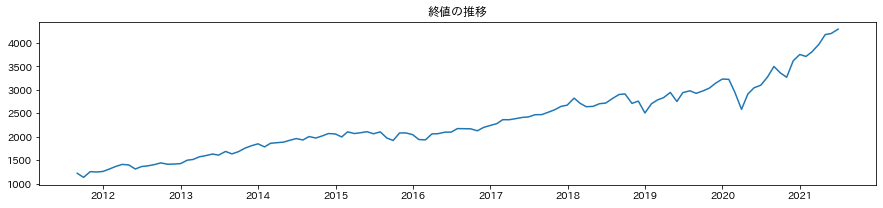

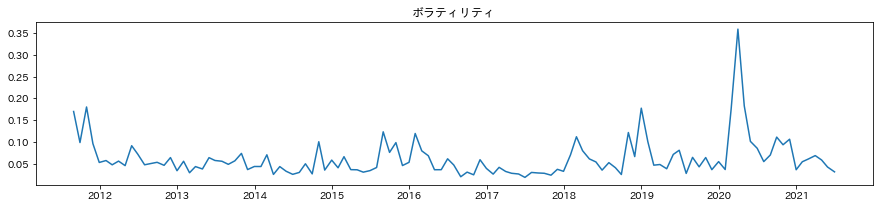

In [7]:
plt.figure(figsize=(15,3))
plt.plot(df['日付'],df['終値'])
plt.title('終値の推移')
plt.show()

plt.figure(figsize=(15,3))
plt.plot(df['日付'],df['ボラティリティ'])
plt.title('ボラティリティ')
plt.show()

### 株のリターンは正規分布するかを検証

平均:1.0109146587101487,標準偏差：0.03909594386818264


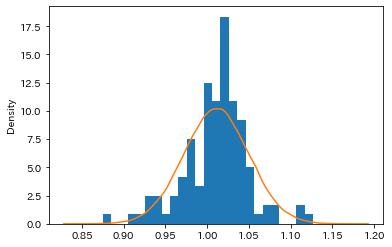

In [8]:
#正規分布を推定
loc, scale = norm.fit(df['前月比率'].dropna())
print('平均:{},標準偏差：{}'.format(loc, scale))

sample = np.random.normal(loc, scale, 100000)


plt.hist(df['前月比率'],bins=25,density=True)
sns.kdeplot(sample)
plt.show()

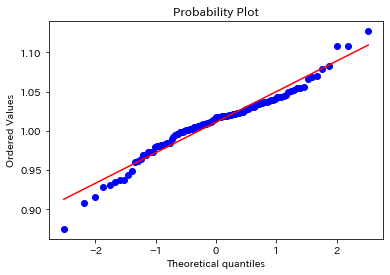

In [9]:
#q-qプロットを確認すると、正規分布していないことがわかる
stats.probplot(df['前月比率'].dropna(), dist="norm",plot=plt)
plt.show()

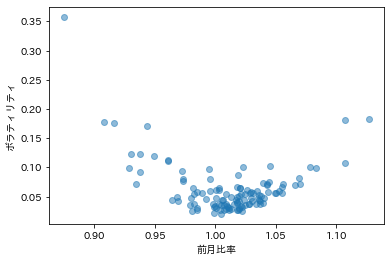

In [10]:
#ボラティリティと前日比率の関係性は以下のようになる

plt.scatter(df['前月比率'],df['ボラティリティ'],alpha=0.5)
plt.xlabel('前月比率')
plt.ylabel('ボラティリティ')
plt.show()

### OneClassSVMを使って、データをクラスタリングする

In [11]:
#正規化を実施
X_train=df[['前月比率','ボラティリティ']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std

array([[-1.73178468e+00,  2.45870054e+00],
       [-2.11471226e+00,  8.35672625e-01],
       [ 2.47617451e+00,  2.69495763e+00],
       [-4.08566780e-01,  7.78303511e-01],
       [-6.09246592e-02, -2.05030587e-01],
       [ 8.35594523e-01, -1.04414704e-01],
       [ 7.59024807e-01, -3.27683224e-01],
       [ 5.22246448e-01, -1.35048458e-01],
       [-4.70947985e-01, -3.70371288e-01],
       [-1.88166144e+00,  6.69788401e-01],
       [ 7.32563528e-01,  2.25069580e-01],
       [ 4.30474409e-02, -3.26879348e-01],
       [ 2.26333017e-01, -2.57663488e-01],
       [ 3.40736924e-01, -1.97274243e-01],
       [-7.85351605e-01, -3.54531882e-01],
       [-2.06362988e-01,  5.01167236e-02],
       [-9.83822823e-02, -6.37017775e-01],
       [ 1.01067786e+00, -1.41726358e-01],
       [ 3.73297846e-03, -7.42806861e-01],
       [ 6.41323324e-01, -4.20821316e-01],
       [ 1.83423255e-01, -5.45661374e-01],
       [ 2.51896330e-01,  4.57303956e-02],
       [-6.62830504e-01, -1.01696510e-01],
       [ 9.

### one class svmでデータを正常・異常に分ける

<ipython-input-12-6133570eb958>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['svm']=pred


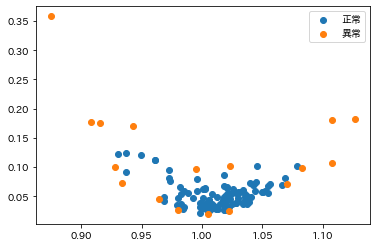

In [12]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(nu=0.15, kernel='rbf', gamma=0.3)
clf.fit(X_train_std)
pred = clf.predict(X_train_std)

X_train['svm']=pred

for i in [1,-1]:    
    temp=X_train[X_train['svm']==i]
    plt.scatter(temp['前月比率'],temp['ボラティリティ'])
plt.legend(['正常','異常'])
plt.show()

### 正常データのみでqqプロット

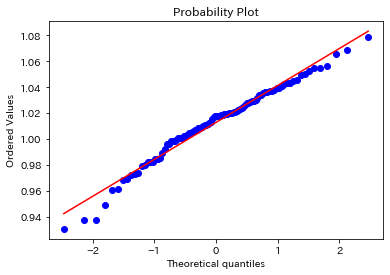

In [13]:
#正規分布していることがわかる
df_temp_1=X_train[X_train['svm']==1]

stats.probplot(df_temp_1['前月比率'].dropna(), dist="norm",plot=plt)
plt.show()

平均:1.0128322069300038,標準偏差：0.02829105949436763


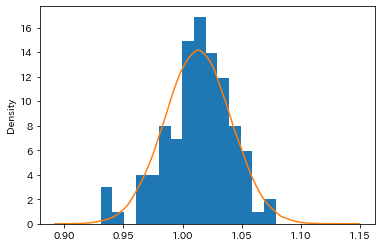

In [14]:
#正規分布を推定
loc1, scale1 = norm.fit(df_temp_1['前月比率'].dropna())
print('平均:{},標準偏差：{}'.format(loc1, scale1))

sample_1 = np.random.normal(loc1, scale1, 100000)

plt.hist(df_temp_1['前月比率'],bins=15,density=True)
sns.kdeplot(sample_1)
plt.show()

### 異常データでqqプロット

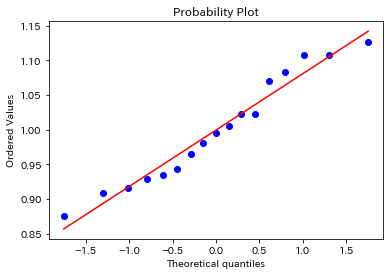

In [15]:
df_temp_2=X_train[X_train['svm']==-1]

stats.probplot(df_temp_2['前月比率'].dropna(), dist="norm",plot=plt)
plt.show()

平均:0.9994093693910199,標準偏差：0.07578068273218344


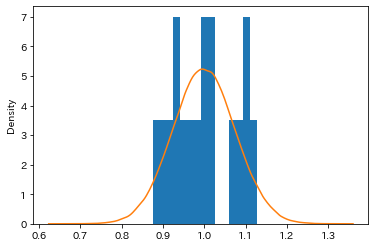

In [16]:
#正規分布を推定
loc2, scale2 = norm.fit(df_temp_2['前月比率'].dropna())
print('平均:{},標準偏差：{}'.format(loc2, scale2))

sample_2 = np.random.normal(loc2, scale2, 100000)

plt.hist(df_temp_2['前月比率'],bins=15,density=True)
sns.kdeplot(sample_2)
plt.show()

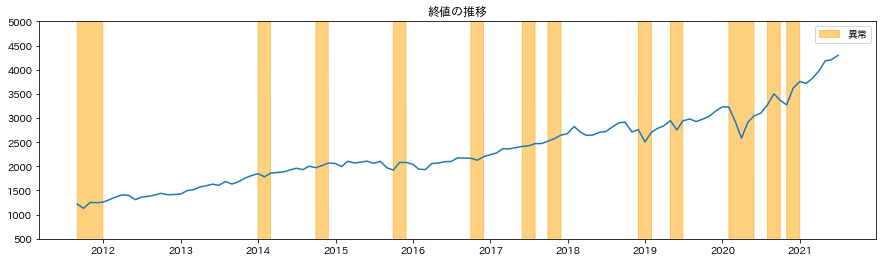

In [17]:
#異常と正常の分布は以下
plt.figure(figsize=(15,4))
plt.plot(df['日付'],df['終値'])
plt.title('終値の推移')
plt.fill_between(df['日付'],-100,(-X_train['svm']+1)*200000, color="orange", alpha=0.5, label='異常')
plt.ylim(500,5000)
plt.legend()

### 正常時のリターンを95%区間推定

In [18]:
#母分散
sigma2 = scale1**2

#標本サイズ
n = len(df_temp_1)

#標本平均
sample_mean = loc1
 
#標準正規分布の上側2.5%点
p_975 = t.ppf(0.975, len(df_temp_1)-1)
 
#信頼区間
x_0 = sample_mean - (p_975 * (np.sqrt(sigma2 / n)))
x_1 = sample_mean + (p_975 * (np.sqrt(sigma2 / n)))
print('下限:{},上限:{}'.format(x_0, x_1))

下限:1.0072753155609748,上限:1.0183890982990327


### 異常時のリターンを95%区間推定

In [19]:
sigma2 = scale2**2
n = len(df_temp_2)
sample_mean = loc2
z_a = stats.norm.ppf(scale=1, loc=0, q=0.975)
x_0 = sample_mean - (z_a * (np.sqrt(sigma2 / n)))
x_1 = sample_mean + (z_a * (np.sqrt(sigma2 / n)))
print('下限:{},上限:{}'.format(x_0, x_1))

下限:0.9633861814435402,上限:1.0354325573384995


### シミュレーションのための関数を作成

In [20]:
#関数を定義
def make_return():
    if np.random.rand()<0.15:
        a=np.random.normal(loc2,scale2)
        svm_result=-1
    else:
        a=np.random.normal(loc1,scale1)
        svm_result=1
    return a,svm_result

In [21]:
#シミュレーションの動作確認
return_list=[]
svm_list=[]
for i in range(10000):
    a,svm_result=make_return()
    return_list.append(a)
    svm_list.append(svm_result)
    
return_list=np.array(return_list)
df_sim=pd.DataFrame({'return':return_list,'svm':svm_list})

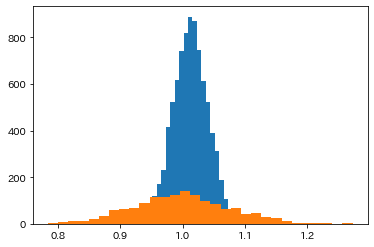

In [22]:
#シミュレーションの結果確認
plt.hist(df_sim[df_sim['svm']==1]['return'],bins=30)
plt.hist(df_sim[df_sim['svm']==-1]['return'],bins=30)
plt.show()

### シミュレーションを1000回実行

In [23]:
df_sim1=pd.DataFrame()

from tqdm import tqdm
for j in tqdm(range(1000)):
    return_list=[]
    for i in range(12*10*2):
        a,svm_result=make_return()
        return_list.append(a)
    return_list=np.array(return_list)
    df_sim1[j]=return_list

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 451.83it/s]


In [24]:
#リターンを計算
df_sim2=df_sim1.cumprod()

損失回数：186/1000
95%点:1.389倍
中央値:1.129倍
5%点:0.901倍


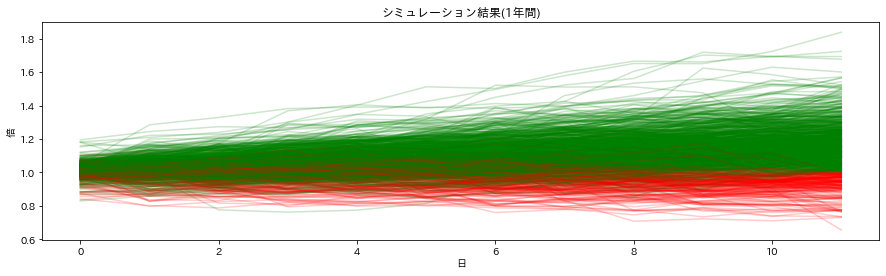

損失回数：28/1000
95%点:2.920倍
中央値:1.843倍
5%点:1.106倍


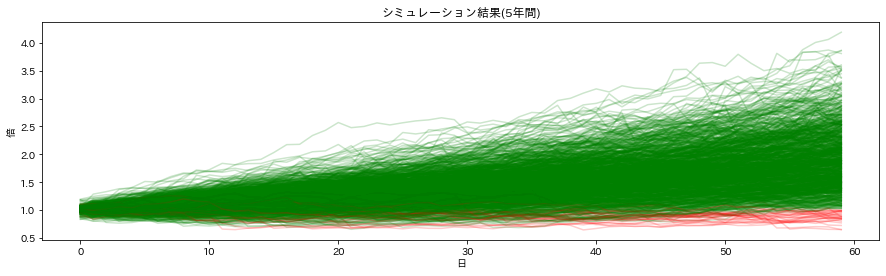

損失回数：6/1000
95%点:6.639倍
中央値:3.328倍
5%点:1.621倍


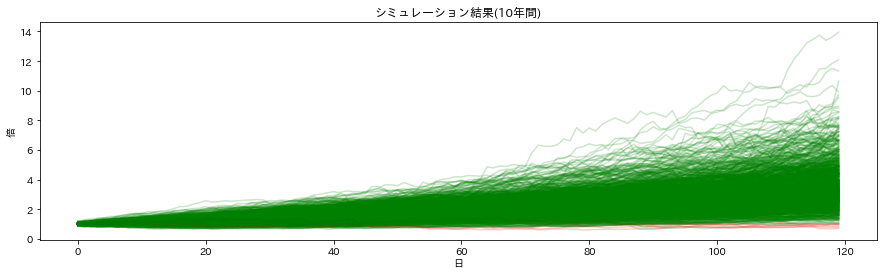

損失回数：0/1000
95%点:29.442倍
中央値:11.067倍
5%点:3.915倍


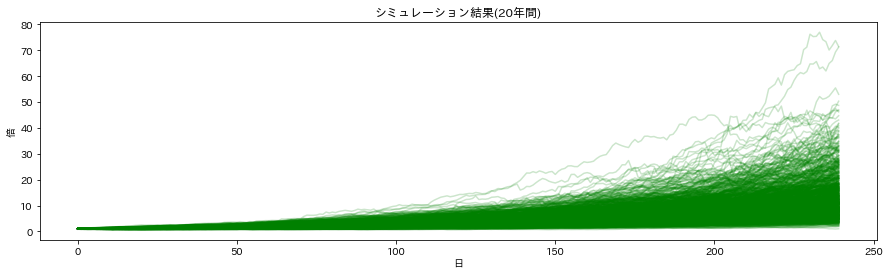

In [25]:
#結果を可視化
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:12*1]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num)) 
print("95%点:{:.3f}倍".format(df_sim2.iloc[12*1-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[12*1-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[12*1-1].quantile(0.05)))
plt.title('シミュレーション結果(1年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()
        
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:12*5]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num)) 
print("95%点:{:.3f}倍".format(df_sim2.iloc[12*5-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[12*5-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[12*5-1].quantile(0.05)))
plt.title('シミュレーション結果(5年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()
        
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:12*10]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num)) 
print("95%点:{:.3f}倍".format(df_sim2.iloc[12*10-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[12*10-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[12*10-1].quantile(0.05)))
plt.title('シミュレーション結果(10年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()
        
plt.figure(figsize=(15,4))
num=0
for i in df_sim2.columns:
    temp=df_sim2[i].iloc[:12*20]
    if temp.iloc[-1]<1:
        plt.plot(temp.index,temp,alpha=0.2,c='r')
        num=num+1
    else:
        plt.plot(temp.index,temp,alpha=0.2,c='g')
print("損失回数：{}/1000".format(num))
print("95%点:{:.3f}倍".format(df_sim2.iloc[12*20-1].quantile(0.95)))
print("中央値:{:.3f}倍".format(df_sim2.iloc[12*20-1].median()))
print("5%点:{:.3f}倍".format(df_sim2.iloc[12*20-1].quantile(0.05)))
plt.title('シミュレーション結果(20年間)')
plt.ylabel('倍')
plt.xlabel('日')
plt.show()